In [194]:
# from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf" #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [3]:
train=pd.read_csv('data/train.csv')
train.head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [4]:
train.rename(columns={'임대건물구분':'건물구분','전용면적별세대수':'세대수',
                      '도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철'
                      ,'도보 10분거리 내 버스정류장 수':'버스','단지내주차면수':'주차면수'},inplace=True)

In [5]:
train.head(3)

,단지코드,총세대수,건물구분,지역,공급유형,전용면적,세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


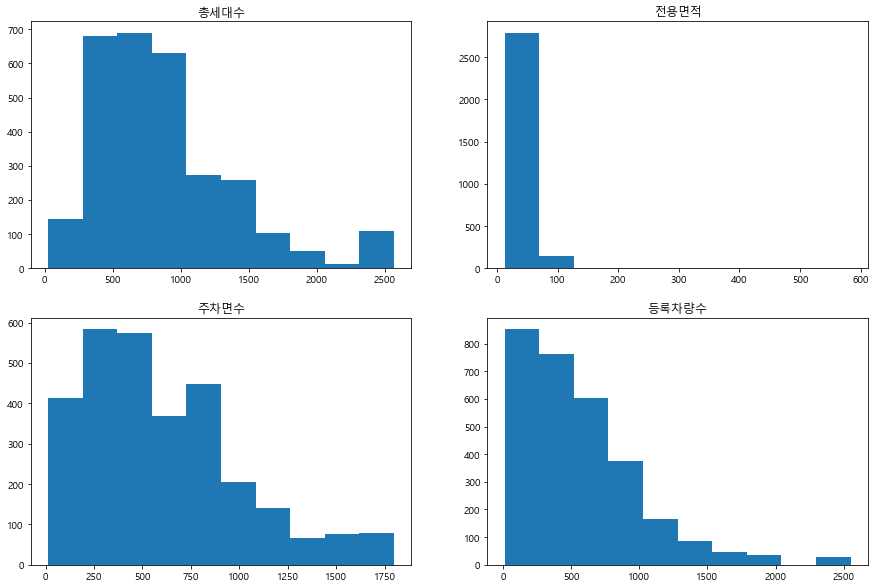

In [48]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(train['총세대수'])
ax2.hist(train['전용면적'])
ax3.hist(train['주차면수'])
ax4.hist(train['등록차량수'])

ax1.title.set_text('총세대수')
ax2.title.set_text('전용면적')
ax3.title.set_text('주차면수')
ax4.title.set_text('등록차량수')
plt.show()

In [50]:
train['전용면적'].sort_values()

101     12.62
786     14.10
391     14.10
219     14.10
767     14.10
        ...  
464    583.40
519    583.40
568    583.40
197    583.40
300    583.40
Name: 전용면적, Length: 2952, dtype: float64

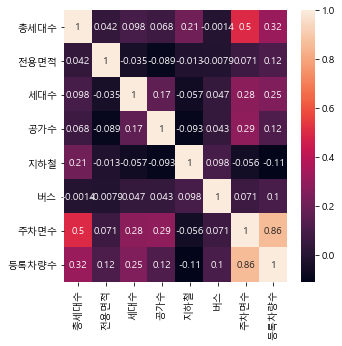

In [52]:
plt.figure(figsize = (5,5))
sns.heatmap(train.corr(), annot = True)
plt.show()

+ 평균면적을 구하는 이유?
+ 총세대수, 전용면적을 이용하여 차원 수를 축소해보고자 함
+ 지금은 평균면적을 사용했으나 특정 면적 이상인 세대수만 추리는것도 하나의 방법이 될 수 있음.

In [53]:
train['면적세대']=train['전용면적']*train['세대수']/train['총세대수']

In [54]:
train.head()

,단지코드,총세대수,건물구분,지역,공급유형,전용면적,세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,주차면수,등록차량수,면적세대
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,5.913867
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,0.662000
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,22.214500
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,0.865500
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,2.365700


In [55]:
A=pd.DataFrame(train['면적세대'].groupby(train['단지코드']).sum())
A.head()

,면적세대
단지코드,
C1000,42.175230
C1004,39.490921
C1005,53.441049
C1013,45.952500
C1014,41.475843


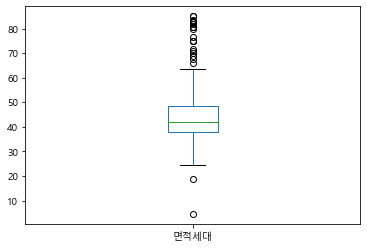

In [56]:
A.plot(kind='box')
plt.show()

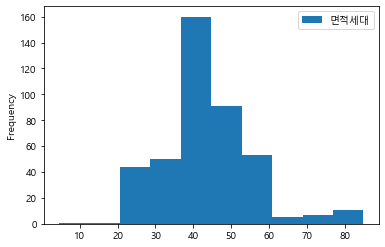

In [58]:
A.plot(kind='hist')
plt.show()

+ 우측꼬리를 가지지만 어느정도 정규분포.
+ 이상치들 특히 아래 두 포인트는 데이콘공지사항에 올라와있는 이상치에 속함
+ Q. 공지된 이상치를 제거해보면?

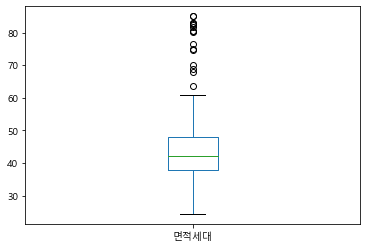

In [63]:
A.drop(['C1490','C2620','C1344','C1024','C2470','C1206','C1740','C2405',
      'C1804','C2085','C1397','C2431','C1649','C1036','C1095','C2051','C1218',
      'C1894','C2483','C1502','C1988']).plot(kind='box')
plt.show()

+ 현재는 이상치를 살리기엔 시간이 부족하므로 단순히 공지된 이상치만 삭제하여 분석하기로 결심

## train2 : train 데이터에서 이상치를 제거한 데이터프레임

In [64]:
train2=train
train2=train2.set_index('단지코드')
train2=train2.drop(['C1490','C2620','C1344','C1024','C2470','C1206','C1740','C2405',
      'C1804','C2085','C1397','C2431','C1649','C1036','C1095','C2051','C1218',
      'C1894','C2483','C1502','C1988'])
train2=train2.reset_index()
train2.head()

,단지코드,총세대수,건물구분,지역,공급유형,전용면적,세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,주차면수,등록차량수,면적세대
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0,16.955009
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,4.359633
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,1.453211
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,3.270092
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,1.635046


In [66]:
train2.shape

(2818, 16)

In [67]:
train.shape

(2952, 16)

#### 데이터프레임을 단지코드별로 압축해 train3로 만들어 보자.
1. 총세대수는 그대로
2. 전용면적> 면적세대 병합
3. 세대수>면적세대 병합
4. 공가수 그대로
5. 지하철 그대로
6. 버스 그대로
7. 주차면수 그대로
8. 등록차량수 그대로
9. 면적세대는 합계. -> 단지별 평균면적이 구해짐

In [175]:
train3=pd.concat([pd.DataFrame(train2['총세대수'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['공가수'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['지하철'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['버스'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['주차면수'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['등록차량수'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['면적세대'].groupby(train2['단지코드']).sum())], ignore_index=True, axis=1)
train3.columns=(['총세대수', '공가수', '지하철', '버스', '주차면수', '등록차량수', '평균면적'])
train3.head()

,총세대수,공가수,지하철,버스,주차면수,등록차량수,평균면적
단지코드,,,,,,,
C1000,566,10.0,0.0,1.0,438.0,481.0,42.175230
C1004,521,3.0,NaN,2.0,153.0,93.0,39.490921
C1005,1144,16.0,NaN,8.0,950.0,376.0,53.441049
C1013,1308,16.0,0.0,6.0,1119.0,1665.0,45.952500
C1014,996,5.0,0.0,2.0,823.0,708.0,41.475843


+ 총세대수-공가수를 계산한 실세대수 칼럼을 추가하고 총세대수와 공가수 칼럼 제거.
+ na확인 및 제거 or 보완

In [176]:
train3['실세대수']=train3['총세대수']-train3['공가수']
train3.drop(['총세대수', '공가수'], axis=1, inplace=True)
train3.head()

,지하철,버스,주차면수,등록차량수,평균면적,실세대수
단지코드,,,,,,
C1000,0.0,1.0,438.0,481.0,42.175230,556.0
C1004,NaN,2.0,153.0,93.0,39.490921,518.0
C1005,NaN,8.0,950.0,376.0,53.441049,1128.0
C1013,0.0,6.0,1119.0,1665.0,45.952500,1292.0
C1014,0.0,2.0,823.0,708.0,41.475843,991.0


In [177]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, C1000 to C2692
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지하철     383 non-null    float64
 1   버스      402 non-null    float64
 2   주차면수    402 non-null    float64
 3   등록차량수   402 non-null    float64
 4   평균면적    402 non-null    float64
 5   실세대수    402 non-null    float64
dtypes: float64(6)
memory usage: 22.0+ KB


In [178]:
train3['지하철']=train3['지하철'].fillna(0)
train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, C1000 to C2692
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지하철     402 non-null    float64
 1   버스      402 non-null    float64
 2   주차면수    402 non-null    float64
 3   등록차량수   402 non-null    float64
 4   평균면적    402 non-null    float64
 5   실세대수    402 non-null    float64
dtypes: float64(6)
memory usage: 22.0+ KB


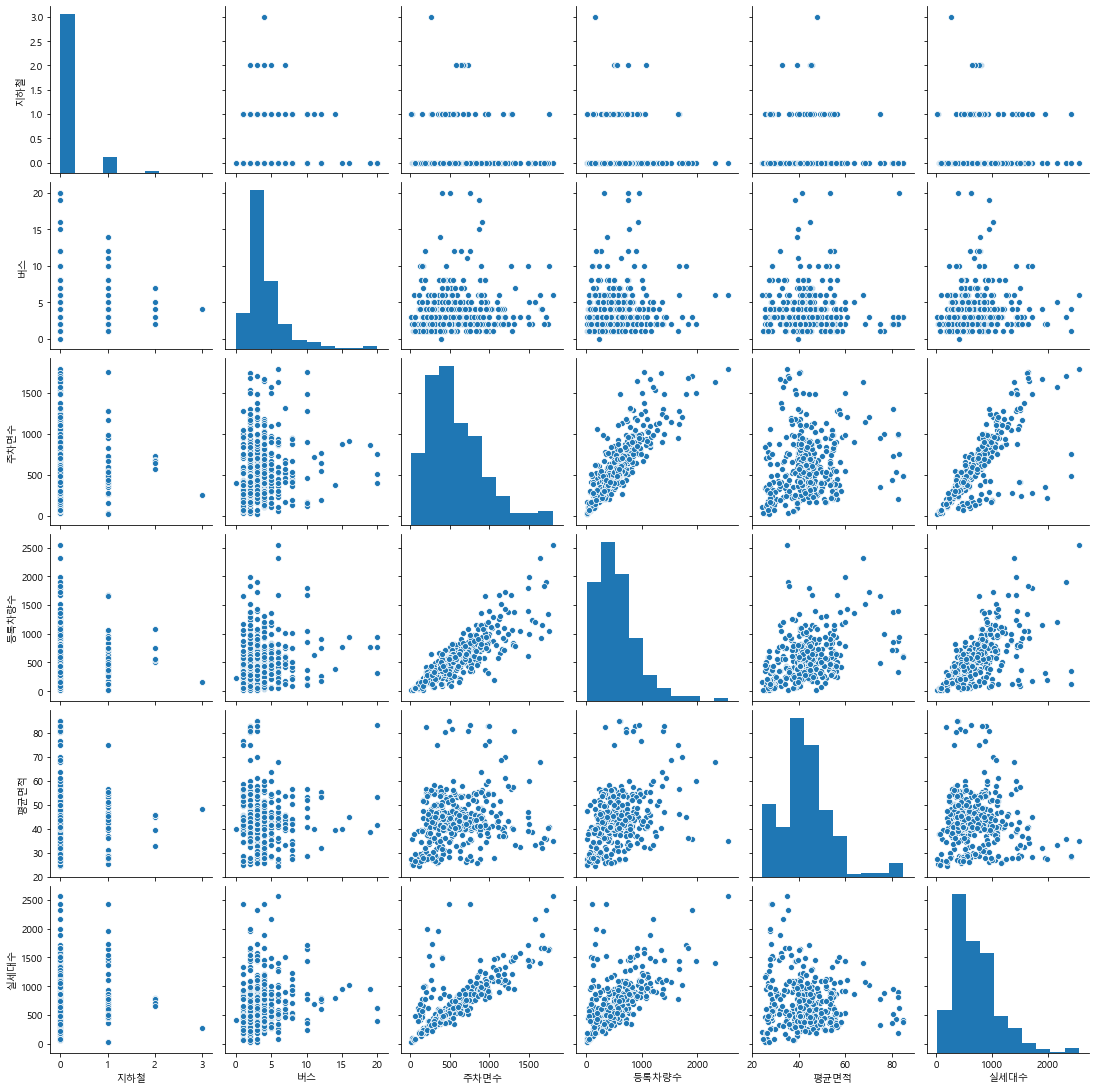

In [179]:
sns.pairplot(train3)
plt.show()

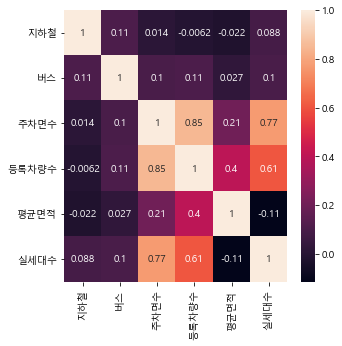

In [180]:
plt.figure(figsize = (5,5))
sns.heatmap(train3.corr(), annot = True)
plt.show()

In [181]:
train3.columns

Index(['지하철', '버스', '주차면수', '등록차량수', '평균면적', '실세대수'], dtype='object')

In [160]:
x_train=train3.iloc[:,[0,1,2,4,5]]
y_train=train3.iloc[:,3]

In [161]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lm_1 = sm.OLS(y_train,x_train_sm).fit()
lm_1.params

const   -321.508465
지하철      -17.471334
버스         2.891282
주차면수       0.803796
면적세대       8.571193
실세대수       0.045155
dtype: float64

In [162]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  등록차량수   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     275.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          2.20e-126
Time:                        15:07:22   Log-Likelihood:                -2659.3
No. Observations:                 402   AIC:                             5331.
Df Residuals:                     396   BIC:                             5355.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -321.5085     45.668     -7.040      0.0

TypeError: 'str' object is not callable

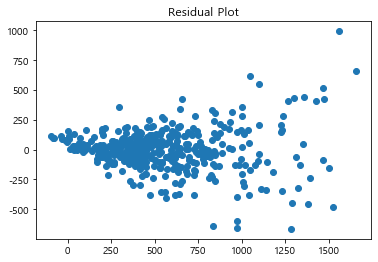

In [196]:
plt.scatter(lm_1.predict(), lm_1.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

TypeError: 'str' object is not callable

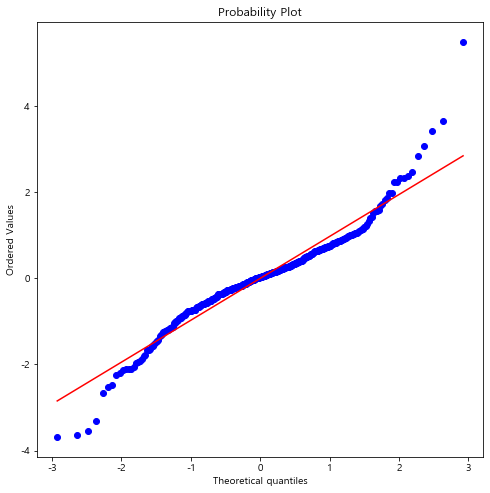

In [267]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
from scipy.stats import probplot 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
probplot(pd.DataFrame(stdsc.fit_transform(np.array(lm_1.resid).reshape(-1,1)))[0], dist='norm',plot=ax)
plt.ylabel('Standard Resid')
plt.show()

In [272]:
from sklearn.metrics import mean_absolute_error
print('MAE :', mean_absolute_error(y_train, lm_1.predict()))

MAE : 124.92600228046723


In [274]:
train3.columns

Index(['지하철', '버스', '주차면수', '등록차량수', '평균면적', '실세대수'], dtype='object')

## 등록차량수 ~ 지하철 + 버스 + 주차면수 + 평균면적 + 실세대수

# __변수변환__

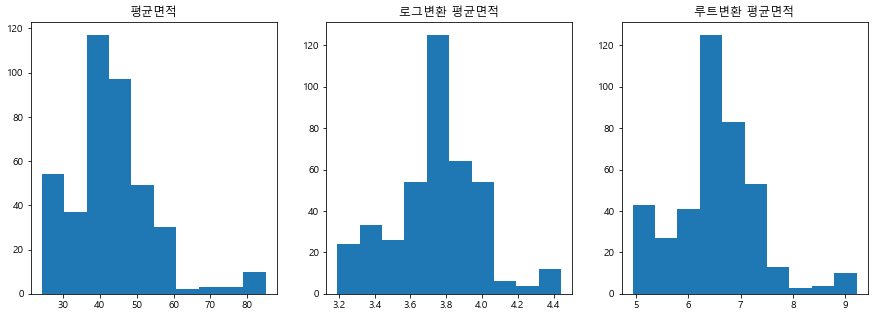

In [286]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(train3['평균면적'])
ax2.hist(np.log(train3['평균면적']))
ax3.hist(np.sqrt(train3['평균면적']))
ax1.title.set_text('평균면적')
ax2.title.set_text('로그변환 평균면적')
ax3.title.set_text('루트변환 평균면적')
plt.show()

+ 평균면적 : 로그변환 채택

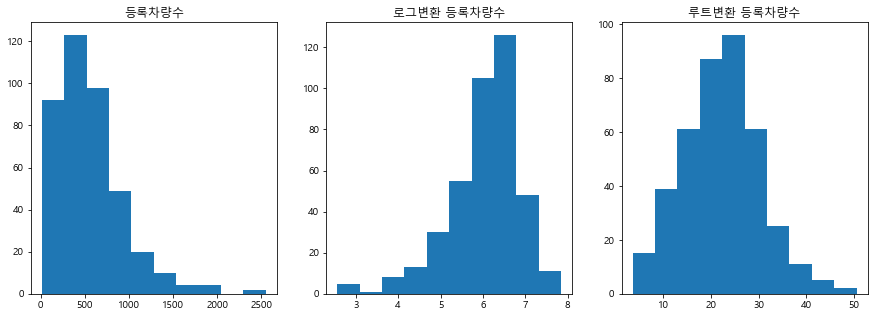

In [281]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(train3['등록차량수'])
ax2.hist(np.log(train3['등록차량수']))
ax3.hist(np.sqrt(train3['등록차량수']))
ax1.title.set_text('등록차량수')
ax2.title.set_text('로그변환 등록차량수')
ax3.title.set_text('루트변환 등록차량수')
plt.show()

+ 등록차량수 : 루트변환 채택

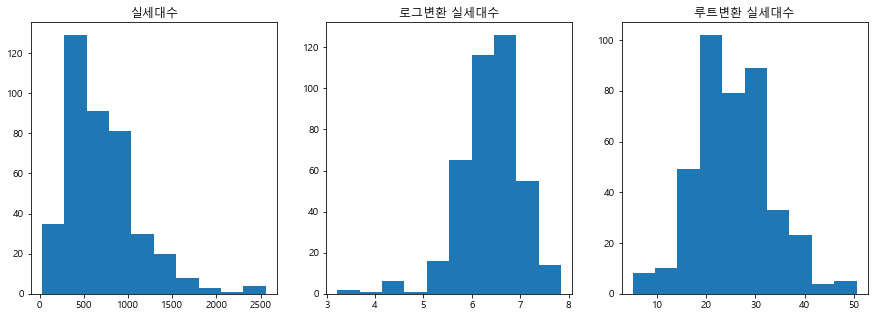

In [282]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(train3['실세대수'])
ax2.hist(np.log(train3['실세대수']))
ax3.hist(np.sqrt(train3['실세대수']))
ax1.title.set_text('실세대수')
ax2.title.set_text('로그변환 실세대수')
ax3.title.set_text('루트변환 실세대수')
plt.show()

+ 실세대수 : 루트변환 채택

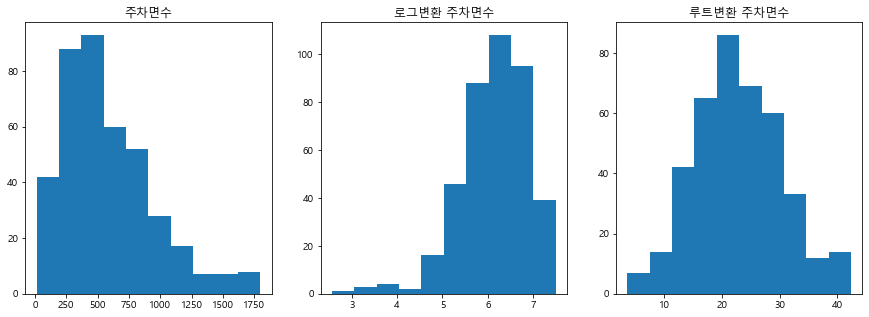

In [284]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(train3['주차면수'])
ax2.hist(np.log(train3['주차면수']))
ax3.hist(np.sqrt(train3['주차면수']))
ax1.title.set_text('주차면수')
ax2.title.set_text('로그변환 주차면수')
ax3.title.set_text('루트변환 주차면수')
plt.show()

+ 주차면수 : 루트변환 채택

In [287]:
train4=train3
train4['평균면적']=np.log(train4['평균면적'])
train4['등록차량수']=np.sqrt(train4['등록차량수'])
train4['실세대수']=np.sqrt(train4['실세대수'])
train4['주차면수']=np.sqrt(train4['주차면수'])
train4.head()

,지하철,버스,주차면수,등록차량수,평균면적,실세대수
단지코드,,,,,,
C1000,0.0,1.0,20.928450,21.931712,3.741833,23.579652
C1004,0.0,2.0,12.369317,9.643651,3.676071,22.759613
C1005,0.0,8.0,30.822070,19.390719,3.978579,33.585711
C1013,0.0,6.0,33.451457,40.804412,3.827608,35.944402
C1014,0.0,2.0,28.687977,26.608269,3.725111,31.480152


In [289]:
x_train2=train4.iloc[:,[0,1,2,4,5]]
y_train2=train4.iloc[:,3]

In [290]:
x_train_sm2 = sm.add_constant(x_train2)
lm_2 = sm.OLS(y_train2, x_train_sm2).fit()
lm_2.params

const   -26.175467
지하철      -0.492191
버스        0.046649
주차면수      0.839785
평균면적      7.668135
실세대수      0.015270
dtype: float64

In [294]:
print(lm_1.summary())
print('='*100)
print('*'*100)
print('='*100)
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  등록차량수   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     275.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          2.20e-126
Time:                        17:17:57   Log-Likelihood:                -2659.3
No. Observations:                 402   AIC:                             5331.
Df Residuals:                     396   BIC:                             5355.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -321.5085     45.668     -7.040      0.0

TypeError: 'str' object is not callable

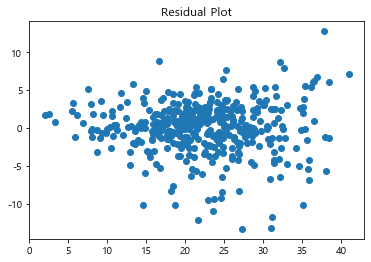

In [295]:
plt.scatter(lm_2.predict(), lm_2.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

### 모델 피팅할 때 등록차량수에 루트를 취했으므로 제곱하여 MAE 계산

In [303]:
print('변수변환 전 MAE :', mean_absolute_error(y_train, lm_1.predict()))
print('변수변환 후 MAE :', mean_absolute_error(y_train, lm_2.predict()**2))

변수변환 전 MAE : 124.92600228046723
변수변환 후 MAE : 118.27761562980389


# 생각해볼 문제들
1. 지역, 임대보증금등의 주어진 변수를 모두 활용을 못한 모형
2. 다중공선성문제를 처리 안함

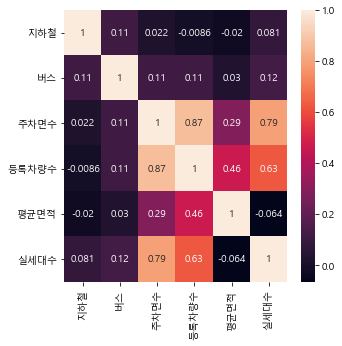

In [304]:
plt.figure(figsize = (5,5))
sns.heatmap(train4.corr(), annot = True)
plt.show()

+ 주차면수와 실세대수는 서로 상관관계가 매우 높음

In [309]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  등록차량수   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     337.8
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          2.23e-140
Time:                        17:32:49   Log-Likelihood:                -1069.5
No. Observations:                 402   AIC:                             2151.
Df Residuals:                     396   BIC:                             2175.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.1755      3.260     -8.028      0.000     -32.585     -19.765
지하철           -0.4922      0.456     -1.079      0.281      -1.389       0.405
버스             0.0466      0.062      0.754      0.451      -0.075       0.168
주차면수           0.8398      0.046     18.188      0.000       0.749       0.931
평균면적           7.6681      0.859      8.930      0.000       5.980       9.356
실세대수           0.0153      0.045      0.339      0.735      -0.073       0.104
==============================================================================
Omnibus:                       51.007   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.823
Skew:                          -0.697   Prob(JB):                     1.73e-23
Kurtosis:                       5.077   Cond. No.                         699.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ 상식적으로 실세대수가 높아지면 등록차량수가 높아져야 하지만 분석결과는 그렇지 못함.
+ 계수를 살펴보면 실세대수는 주차수요의 p값이 0.735로 높아 분석에 크게 활용하지 못함을 알 수 있음.